In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob as gl
from matplotlib.colors import LinearSegmentedColormap

In [30]:
files = gl.glob('*.txt')
files = sorted(files)
files

['08 3_Large Area Scan_007_Ext.AD 1.txt',
 '09 3_Large Area Scan_008_Ext.AD 1.txt',
 '10 3_Large Area Scan_009_Ext.AD 1.txt']

In [31]:
datasets = [np.loadtxt(f) for f in files]

global_min = min(data.min() for data in datasets)
global_max = max(data.max() for data in datasets)

In [32]:
(x, y) = datasets[0].shape
ratio = y/x

In [33]:
base = plt.cm.afmhot
colors = base(np.linspace(0, 0.8, 256))  # cut off the white
custom_hot = LinearSegmentedColormap.from_list("custom_hot", colors)

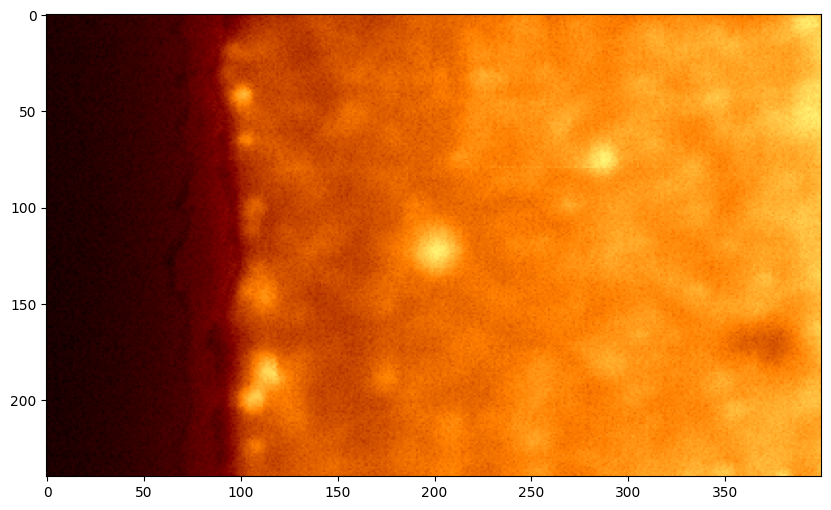

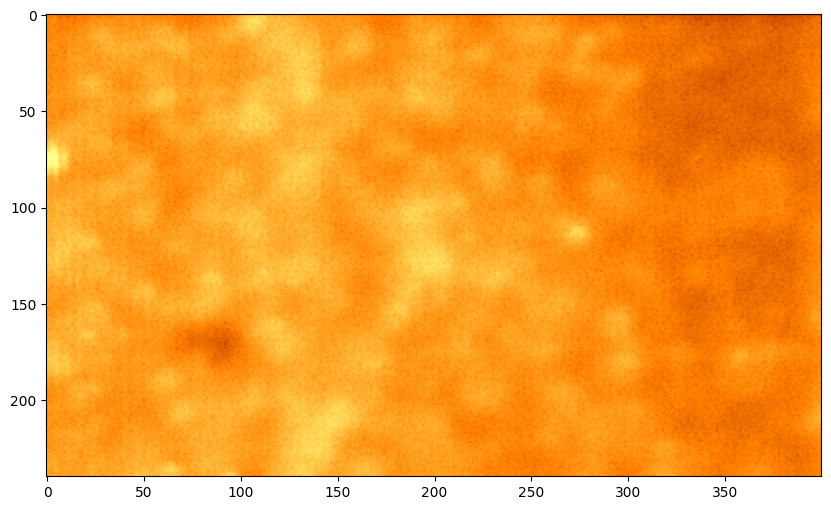

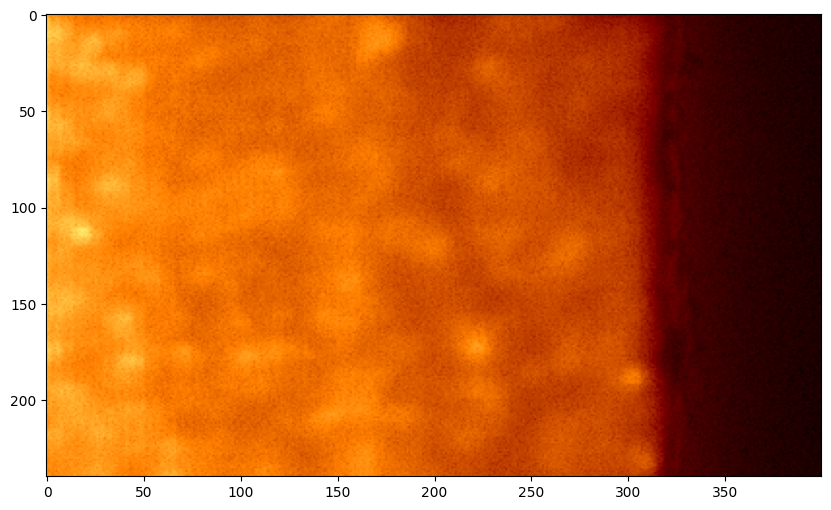

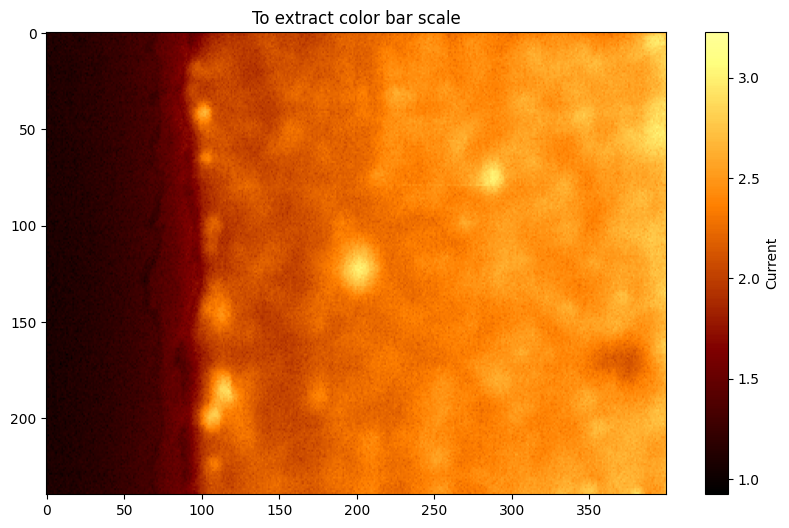

In [36]:
for data in datasets:
  plt.figure(figsize=(6*ratio, 6))
  plt.imshow(data, cmap=custom_hot, aspect='auto', vmin=global_min, vmax=global_max)
  plt.show()

plt.figure(figsize=(6*ratio, 6))
plt.imshow(datasets[0], cmap=custom_hot, aspect='auto', vmin=global_min, vmax=global_max)
plt.title('To extract color bar scale')
plt.colorbar(label='Current')

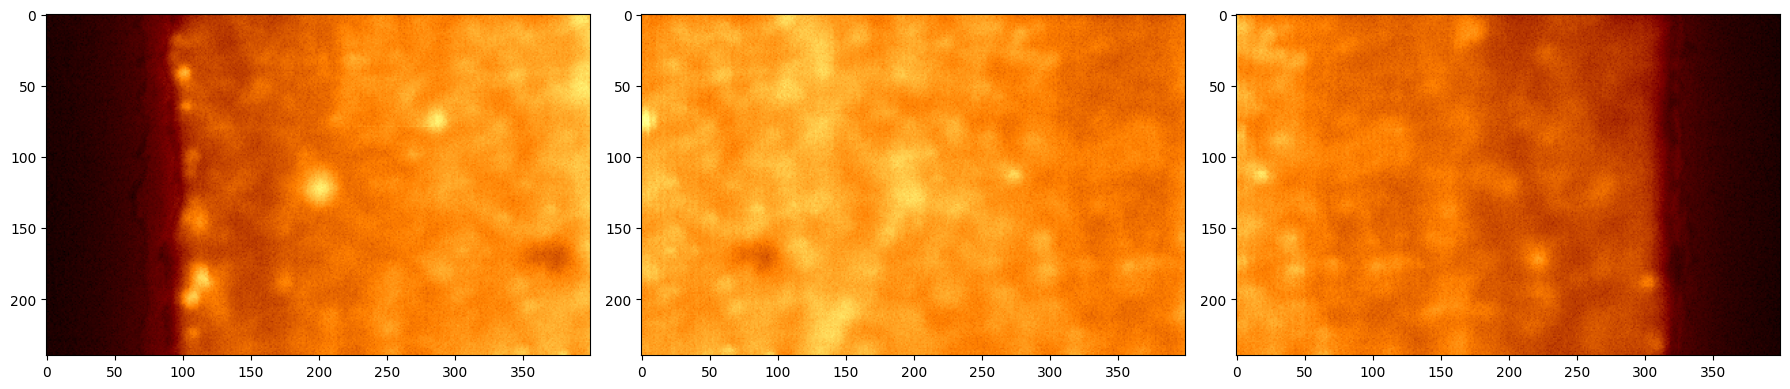

In [40]:
fig, axes = plt.subplots(1, len(datasets), figsize=(6*len(datasets), 4))

# In case there is only one file (avoid indexing error)
if len(datasets) == 1:
    axes = [axes]

# Plot using a for loop
for i, data in enumerate(datasets):
    im = axes[i].imshow(data, cmap=custom_hot, aspect='auto', vmin=global_min, vmax=global_max)

# Shared colorbar
#fig.colorbar(im, ax=axes, label="Intensity")

plt.tight_layout()
plt.show()